In [1]:
import os
import math
import numpy as np
import glob
from tqdm import tqdm
import scipy

In [29]:
import keras
from keras.models import Sequential, Model
from keras.layers.core import Dense,Dropout,Activation,Flatten,Reshape
from keras.layers import Embedding, Input, merge, ELU
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.regularizers import l2
from keras.utils.np_utils import to_categorical
import sklearn.metrics as metrics

In [3]:
import matplotlib.pyplot as plt
plt.ion()

In [4]:
datadir= 'crowdai'

In [5]:
num_classes =38
classes = [datadir + '/c_' + str(i) for i in range(num_classes)]

100%|███████████████████████████████████████| 270/270 [00:01<00:00, 221.40it/s]


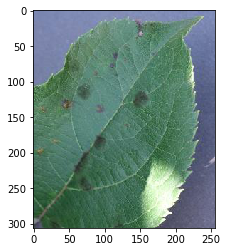

In [6]:
d0 = glob.glob(classes[0]+ '/*')
i0 = scipy.misc.imread(d0[0], mode='RGB')
I = np.array([scipy.misc.imread(d, mode='RGB') for d in tqdm(d0)])
plt.imshow(I[0])

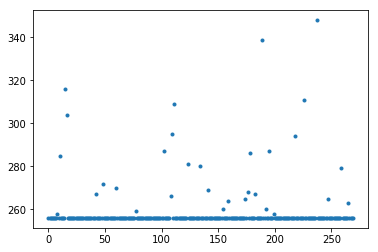

In [7]:
sizes=np.array([i.shape[:2] for i in I])#checking to see if the data obtained is having the same dimensions throughout
plt.plot(sizes[:,1],'.') #saw that one of the dimensions is always 256

In [8]:
i0.shape#having 3 color channels 

(306, 256, 3)

In [9]:
sizes#to check all the dimensions of the images belonging to one class

array([[306, 256],
       [446, 256],
       [411, 256],
       [302, 256],
       [349, 256],
       [306, 256],
       [319, 256],
       [337, 256],
       [256, 258],
       [471, 256],
       [256, 285],
       [496, 256],
       [432, 256],
       [358, 256],
       [384, 256],
       [256, 316],
       [256, 304],
       [264, 256],
       [356, 256],
       [324, 256],
       [273, 256],
       [301, 256],
       [399, 256],
       [403, 256],
       [277, 256],
       [323, 256],
       [388, 256],
       [451, 256],
       [448, 256],
       [516, 256],
       [290, 256],
       [310, 256],
       [479, 256],
       [292, 256],
       [273, 256],
       [427, 256],
       [392, 256],
       [384, 256],
       [388, 256],
       [303, 256],
       [623, 256],
       [303, 256],
       [256, 267],
       [377, 256],
       [441, 256],
       [281, 256],
       [444, 256],
       [409, 256],
       [256, 272],
       [464, 256],
       [429, 256],
       [371, 256],
       [306,

In [10]:
def new_dims(dims):
	'''
	>>> new_dims((256,380))
	((0,256),(62,318))
	'''
	smaller=min(dims) #we want the smallest possible computatiom so we are minimizing the dimensions
	w_min= int((dims[0]-smaller)/2)
	w_max=int((dims[0]-w_min))
	h_min=int((dims[1]-smaller)/2)
	h_max=int((dims[1]-h_min))
	return ((w_min,w_max),(h_min,h_max)) #averaging out all values getting the start ht and wt and the end ht and the wt

In [11]:
nd = [new_dims(s) for s in sizes]

In [12]:
nd

[((25, 281), (0, 256)),
 ((95, 351), (0, 256)),
 ((77, 334), (0, 256)),
 ((23, 279), (0, 256)),
 ((46, 303), (0, 256)),
 ((25, 281), (0, 256)),
 ((31, 288), (0, 256)),
 ((40, 297), (0, 256)),
 ((0, 256), (1, 257)),
 ((107, 364), (0, 256)),
 ((0, 256), (14, 271)),
 ((120, 376), (0, 256)),
 ((88, 344), (0, 256)),
 ((51, 307), (0, 256)),
 ((64, 320), (0, 256)),
 ((0, 256), (30, 286)),
 ((0, 256), (24, 280)),
 ((4, 260), (0, 256)),
 ((50, 306), (0, 256)),
 ((34, 290), (0, 256)),
 ((8, 265), (0, 256)),
 ((22, 279), (0, 256)),
 ((71, 328), (0, 256)),
 ((73, 330), (0, 256)),
 ((10, 267), (0, 256)),
 ((33, 290), (0, 256)),
 ((66, 322), (0, 256)),
 ((97, 354), (0, 256)),
 ((96, 352), (0, 256)),
 ((130, 386), (0, 256)),
 ((17, 273), (0, 256)),
 ((27, 283), (0, 256)),
 ((111, 368), (0, 256)),
 ((18, 274), (0, 256)),
 ((8, 265), (0, 256)),
 ((85, 342), (0, 256)),
 ((68, 324), (0, 256)),
 ((64, 320), (0, 256)),
 ((66, 322), (0, 256)),
 ((23, 280), (0, 256)),
 ((183, 440), (0, 256)),
 ((23, 280), (0

In [13]:
nd =[new_dims(s) for s in sizes]

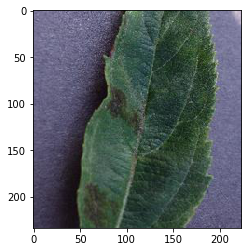

In [14]:
Ip= np.array([scipy.misc.imresize(
    ii[nn[0][0]:nn[0][1],nn[1][0]:nn[1][1]]
    ,(234,224),'cubic','RGB') for ii,nn in zip(I,nd)])#resizing to 224*224 using cubic interpolation and RGB colors for imagenet ease
plt.imshow(Ip[1])

In [15]:
num_data=len(glob.glob(datadir + '/*/*'))
all_imgs = np.zeros((num_data,224,224,3),dtype=np.uint8)
labels = np.zeros((num_data,num_classes),dtype=np.float16)

In [16]:
cnt=0
for i,c in enumerate(classes):
    images = glob.glob(c + '/*')
    for j,im in enumerate(images):
        img_tmp = scipy.misc.imread(im,mode='RGB')
        s = img_tmp.shape[:2]
        nn = new_dims(s)
        all_imgs[cnt] = scipy.misc.imresize(img_tmp[nn[0][0]:nn[0][1],nn[1][0]:nn[1][1]],(224,224),'cubic','RGB')
        labels[cnt][i] =1
        cnt +=1

In [17]:
all_imgs = all_imgs.transpose((0,3,1,2))

In [18]:
np.savez_compressed('crop_img_labs.npz',all_imgs,labels)

In [34]:
model = Sequential()
nrows = 224
ncols = 224

#keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)



In [20]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 3, 224, 8)     44808       convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 3, 224, 8)     0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 1, 112, 8)     0           activation_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 1, 112, 8)     1608        maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [1]:
#plt.imshow(all_imgs[0])

In [3]:
#all_imgs[1]

In [27]:
all_imgs[2]

array([[[156, 157, 157, ..., 161, 158, 157],
        [158, 158, 158, ..., 160, 159, 158],
        [159, 158, 157, ..., 159, 159, 158],
        ..., 
        [ 73,  73,  74, ..., 113, 114, 114],
        [ 65,  62,  66, ..., 114, 114, 114],
        [ 63,  58,  61, ..., 114, 113, 112]],

       [[149, 150, 150, ..., 155, 152, 152],
        [151, 151, 151, ..., 154, 153, 153],
        [152, 151, 150, ..., 153, 154, 154],
        ..., 
        [116, 115, 117, ..., 102, 103, 103],
        [108, 105, 109, ..., 103, 103, 103],
        [107, 102, 104, ..., 103, 102, 101]],

       [[156, 157, 157, ..., 157, 153, 149],
        [158, 158, 158, ..., 155, 152, 150],
        [159, 158, 157, ..., 155, 152, 151],
        ..., 
        [ 47,  47,  49, ..., 106, 107, 107],
        [ 36,  33,  38, ..., 107, 107, 107],
        [ 32,  27,  32, ..., 107, 106, 105]]], dtype=uint8)

In [28]:
labels[0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float16)

In [ ]:
d0 = glob.glob(classes[0]+ '/*')


In [ ]:
i0 = scipy.misc.imread(d0[0], mode='RGB')